In [1]:
import numpy as np
import matplotlib.pyplot as plt

from synphot import SpectralElement

from astropy.modeling.models import BlackBody
import astropy.units as u
from astropy import constants as const
import scipy.integrate as integrate



Assume a q of the system and a P orb. If it is close to riche filling to calcilate R. Then with a Teff of MUSE and R a flux at at given wavelenght and compare it to the Hugs data in F814W. Should be factor of 2.5 or something. 

Plancks law and filter I guess.

photlam synphot.units.PHOTLAM photons−1cm−2𝐴˚−1

in flam

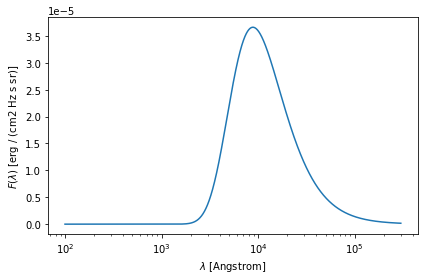

In [2]:
wavelengths = np.logspace(np.log10(100), np.log10(3e5), num=10000) * u.AA



# blackbody parameters
temperature = 5780* u.K

# BlackBody provides the results in ergs/(cm^2 Hz s sr) when scale has no units
bb = BlackBody(temperature=temperature)
bb_result = bb(wavelengths)

newbbresult = []
for f,wav in zip(bb_result,wavelengths):
    n = f.to(u.erg/u.s/u.cm**2/u.AA/u.sr,equivalencies=u.spectral_density(wav))
    newbbresult.append(n.value)
newbbresult = np.array(newbbresult)*u.erg/u.s/u.cm**2/u.AA/u.sr


fig, ax = plt.subplots(ncols=1)
ax.plot(wavelengths, bb_result, '-')

ax.set_xscale('log')
ax.set_xlabel(r"$\lambda$ [{}]".format(wavelengths.unit))
ax.set_ylabel(r"$F(\lambda)$ [{}]".format(bb_result.unit))

plt.tight_layout()
plt.show()

In [3]:
integral = np.trapz(x=wavelengths, y=newbbresult)
integral = integral * np.pi *u.sr
integral

<Quantity 6.32864586e+10 erg / (cm2 s)>

In [4]:
lum = integral*4*np.pi*1*const.R_sun.cgs**2
lum

<Quantity 3.84914848e+33 erg / s>

In [5]:
const.L_sun.cgs

<Quantity 3.828e+33 erg / s>

In [6]:
np.log(lum.cgs/const.L_sun.cgs)

<Quantity 0.00550948>

# In a filter

In [62]:
i = SpectralElement.from_filter('johnson_u') 
iflux = i(wavelengths)*newbbresult
ifluxhz = i(wavelengths)*bb_result
#bp = stsyn.band('acs,wfc1,f814w')  

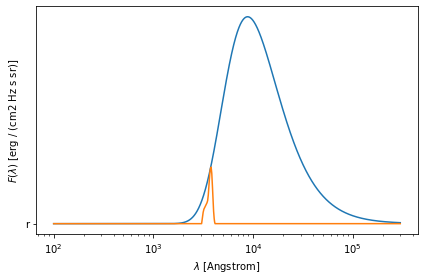

In [63]:

fig, ax = plt.subplots(ncols=1)
ax.plot(wavelengths, bb_result, '-')
ax.plot(wavelengths, bb_result*i(wavelengths), '-','r')


ax.set_xscale('log')
ax.set_xlabel(r"$\lambda$ [{}]".format(wavelengths.unit))
ax.set_ylabel(r"$F(\lambda)$ [{}]".format(bb_result.unit))

plt.tight_layout()
plt.show()

In [64]:
iflux

<Quantity [0., 0., 0., ..., 0., 0., 0.] erg / (Angstrom cm2 s sr)>

Text(0.5, 0, '$\\lambda$ [Angstrom]')

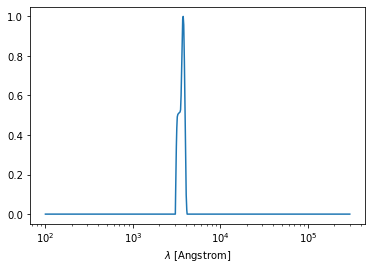

In [65]:
fig, ax = plt.subplots(ncols=1)

ax.plot(wavelengths,i(wavelengths))

ax.set_xscale('log')
ax.set_xlabel(r"$\lambda$ [{}]".format(wavelengths.unit))

# Integrate in I


In [66]:
integrainI = np.trapz(x=wavelengths, y=iflux)
integrainI = integrainI * np.pi *u.sr
integrainI

<Quantity 3.5493503e+09 erg / (cm2 s)>

In [67]:
lumi = integrainI*4*np.pi*1*const.R_sun.cgs**2
lumi

<Quantity 2.15875191e+32 erg / s>

In [68]:
fi = lumi/(4*np.pi*const.au.cgs**2)
fi/((i.waverange[1]-i.waverange[0]))

<Quantity 69.78295581 erg / (Angstrom cm2 s)>

In [52]:
np.log(lumi.cgs/const.L_sun.cgs)

<Quantity -1.78814225>

In [33]:
lum

<Quantity 3.84914848e+33 erg / s>

In [205]:
lumi

<Quantity 4.2140697e+32 erg / s>

In [63]:
tryab=(-26.77 * u.ABmag).to(u.jansky)
tryab

<Quantity 1.85353162e+14 Jy>

In [64]:
tryab.to(u.jansky)

<Quantity 1.85353162e+14 Jy>

In [65]:
# To AB

In [66]:
abtry = ((1.8)*10**(14))*u.jansky
abtry.to(u.AB)

<Quantity 4.95761167e+10 AB>

In [61]:
abtry

<Quantity 1.8e+14 Jy>